## Урок 9. Линейная регрессия Логистическая регрессия

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import euclidean_distances

%config InlineBackend.figure_format='retina'

### Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
- zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
- ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 

Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Сначала посмотрим, что можно вытащить из данных 🙂

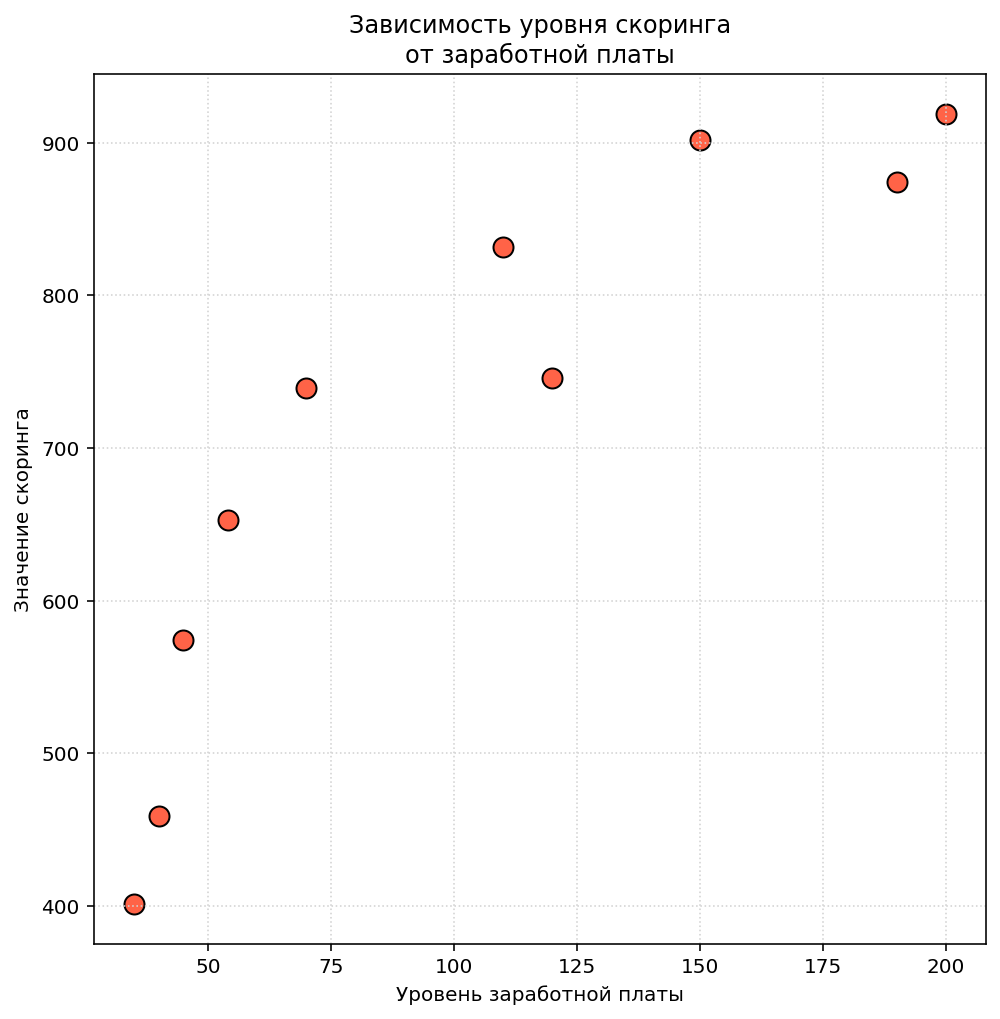

In [3]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(zp, ks, s=100, c='tomato', edgecolor='black')
ax.set_xlabel('Уровень заработной платы')
ax.set_ylabel('Значение скоринга')
ax.grid(ls=':', color='lightgray')
ax.set_title('Зависимость уровня скоринга\nот заработной платы');

Хм... я бы здесь строил параболу. Но - прямая, так прямая.

Я пойду, наверное самым простым путем: применю матричные вычисления

$\displaystyle \overline B = (X^T \cdot X)^{-1} \cdot X^T \cdot y$

За X, по условиям задачи, берем zp, за y - ks

In [4]:
def calc(X: np.array, Y: np.array):
    return (np.linalg.inv(np.dot(X.transpose(), X)) @ X.transpose() @ Y).reshape(1, -1)

In [5]:
X = zp
Y = ks

Чтобы сделать расчет со свободным членом, добавим в матрицу X дополнительный вектор с единицами

In [6]:
X = list(zip([1]*len(X), X))
X = np.array(X)
X

array([[  1,  35],
       [  1,  45],
       [  1, 190],
       [  1, 200],
       [  1,  40],
       [  1,  70],
       [  1,  54],
       [  1, 150],
       [  1, 120],
       [  1, 110]])

In [7]:
Y = np.array(Y).reshape(-1, 1)
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [8]:
B = calc(X, Y)
B

array([[444.17735732,   2.62053888]])

Посмотрим, что получилось:

In [9]:
X_predict = X.dot(B.transpose()).reshape(-1, 1)

errore = round(mean_squared_error(Y, X_predict), 3)

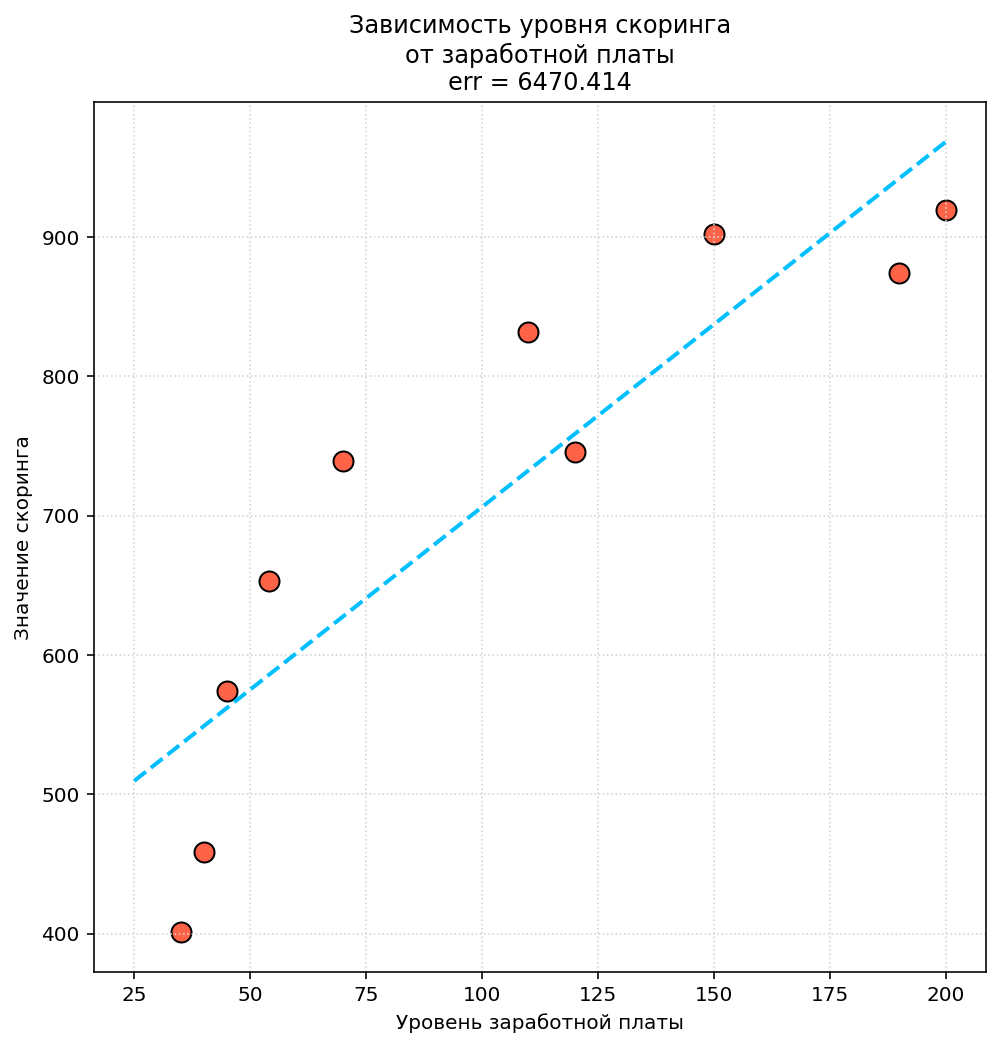

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(25, 200, 1000)
y = B[0, 0] + B[0, 1] * x

ax.scatter(zp, ks, s=100, c='tomato', edgecolor='black')
ax.plot(x, y, color='deepskyblue', lw=2, ls='--')
ax.set_xlabel('Уровень заработной платы')
ax.set_ylabel('Значение скоринга')
ax.grid(ls=':', color='lightgray')
ax.set_title(f'Зависимость уровня скоринга\nот заработной платы\nerr = {errore}');

Не, слабовато. Проверю свою теорию:

In [11]:
X = np.hstack([X, (X[:, 1] ** 2).reshape(-1, 1)])

In [12]:
B = calc(X, Y)
B

array([[ 2.24304958e+02,  7.93343533e+00, -2.31447019e-02]])

In [13]:
X_predict = X.dot(B.transpose()).reshape(-1, 1)

errore = round(mean_squared_error(Y, X_predict), 3)

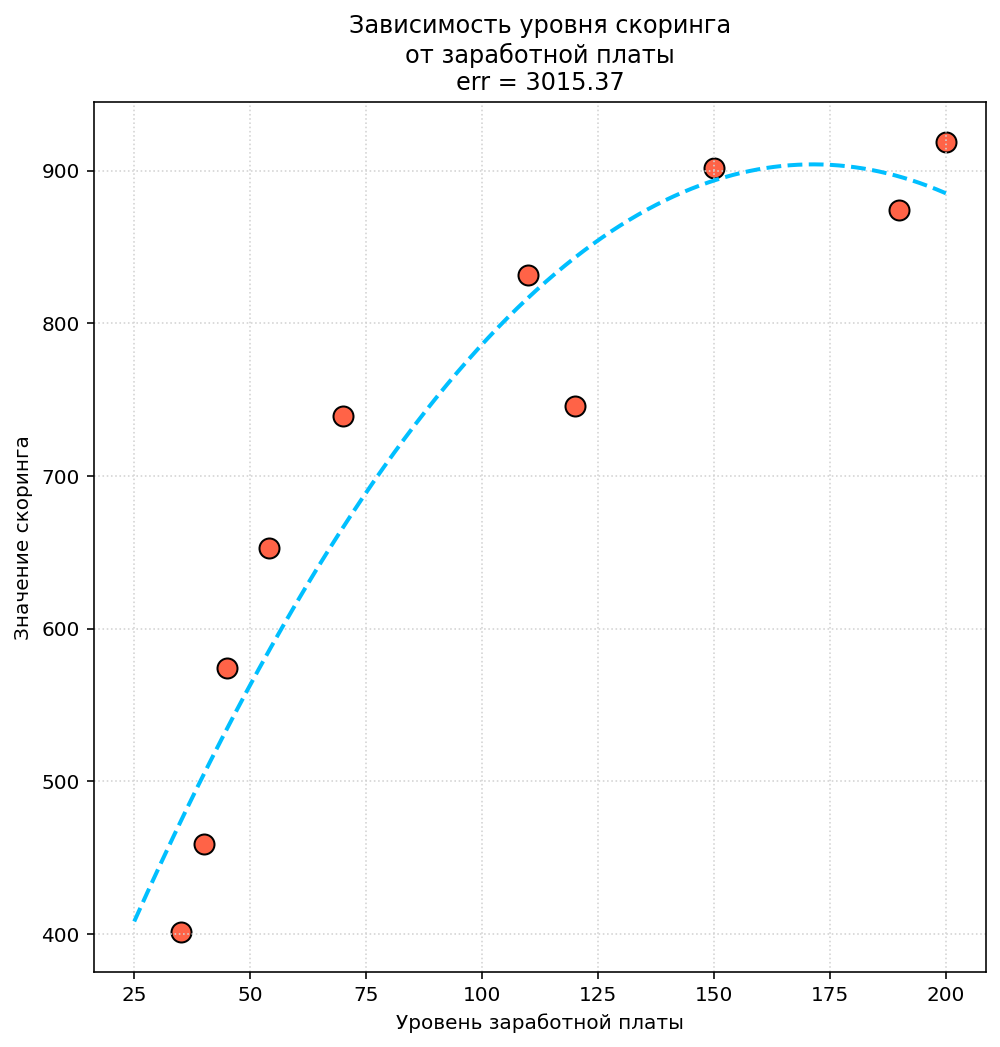

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(25, 200, 1000)
y = B[0, 0] + B[0, 1] * x + B[0, 2] * x ** 2

ax.scatter(zp, ks, s=100, c='tomato', edgecolor='black')
ax.plot(x, y, color='deepskyblue', lw=2, ls='--')
ax.set_xlabel('Уровень заработной платы')
ax.set_ylabel('Значение скоринга')
ax.grid(ls=':', color='lightgray')
ax.set_title(f'Зависимость уровня скоринга\nот заработной платы\nerr = {errore}');

Уже интереснее 🙂

Теперь вычислим коэффициенты для прямой без свободного члена. Для этого уберем вектор с единицами (и квадратами):

In [15]:
X = X[:, 1].reshape(-1, 1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [16]:
B = calc(X, Y)
B

array([[5.88982042]])

In [17]:
X_predict = X.dot(B.transpose()).reshape(-1, 1)

errore = round(mean_squared_error(Y, X_predict), 3)

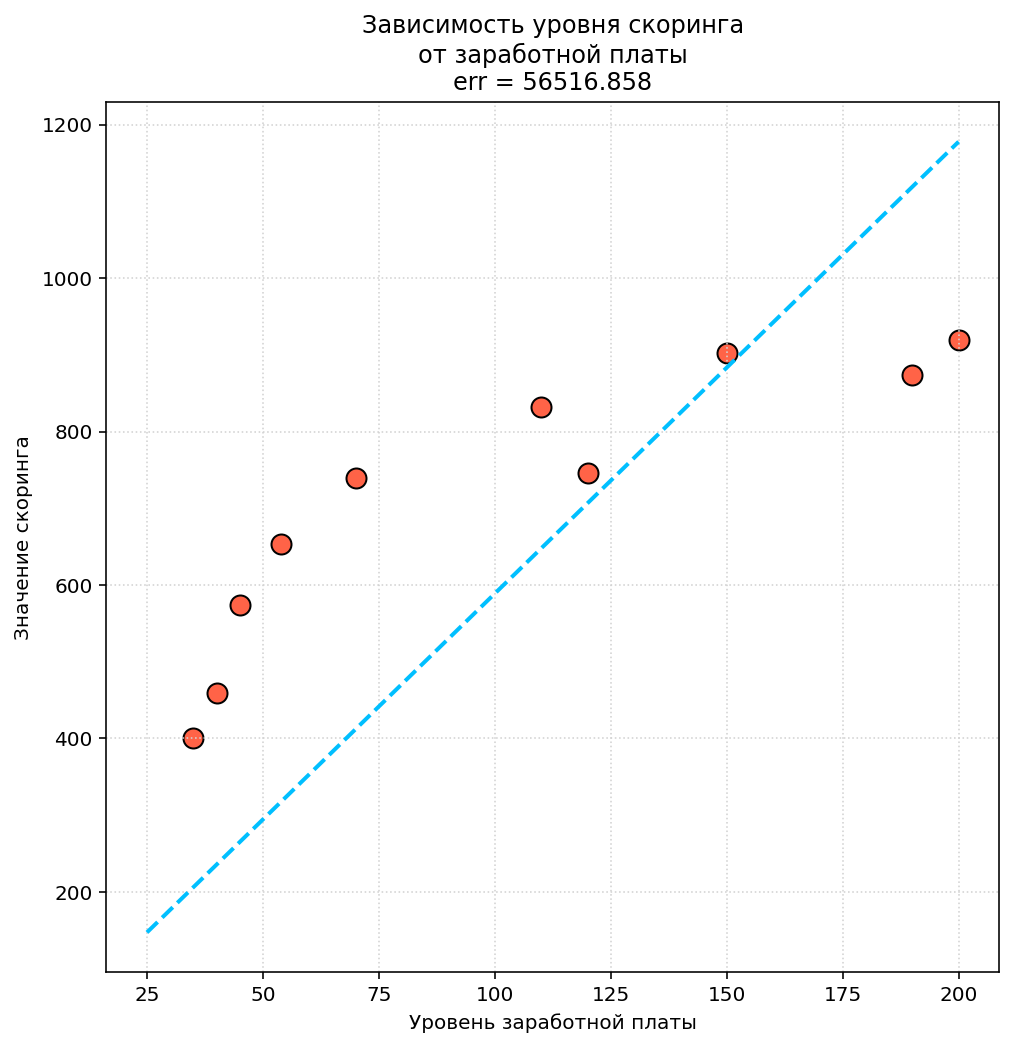

In [18]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(25, 200, 1000)
y = B[0, 0] * x

ax.scatter(zp, ks, s=100, c='tomato', edgecolor='black')
ax.plot(x, y, color='deepskyblue', lw=2, ls='--')
ax.set_xlabel('Уровень заработной платы')
ax.set_ylabel('Значение скоринга')
ax.grid(ls=':', color='lightgray')
ax.set_title(f'Зависимость уровня скоринга\nот заработной платы\nerr = {errore}');

### Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Шаг градиентного спуска вычисляется по формуле:

$\displaystyle B^{k+1} = B^k - \eta \nabla L(\omega)$

- B - вектор весов
- $\eta$ - шаг градиентного спуска (или скорость обучения)
- $\nabla L(\omega)$ - градиент функции ($\omega$ - частная производная функции ппоотерь по соответствующему параметру)

Алгоритм подбора параметров методом градиентного спуска выглядит так:
1. Стартуем алгоритм в случайной начальной точке $X_0$
2. Вычисляем направление градиента: $\nabla L(x_0)$
3. Перемещаемся на 1 шаг по направлению антиградиента в новую точку $x_1 = x_0 - \eta \nabla L(x_0)$
4. Повторяем шаги 2−3 для попадания в минимум функции
5. ...
6. Достигли оптимальной точки $x_{min}$

Для того, чтобы написать функцию, остается только понять формулы функции потерь и ее производную. Для линейной функции без интерцептора, они будут выглядеть так:

$\displaystyle MSE(y, f(x)) = \frac{\sum_{i = 0}^{n-1}(y_i - Bx_i)^2}{n}$

Ее производная:

$\displaystyle MSE(y, f(x))' = \frac{2 \cdot \sum_{i = 0}^{n-1}(y_i - Bx_i) \cdot x_i}{n}$

Вот теперь - пишем функцию:

In [19]:
def distance(A, B):
    return np.sqrt(np.dot(A, A) - 2 * np.dot(A, B) + np.dot(B, B))

In [20]:
def gradient_descent(X, Y, B, eta=0.00001, epsilon=0.00001, iters=100):
    n = X.shape[0]
    errors = []
    iterations = []
    
    for i in range(iters):
        predict = X.dot(B.transpose()).reshape(-1, 1)
        errore = Y - predict

        errors.append(mean_squared_error(Y, predict))
        iterations.append(i)

        B_current = B

        gradient = 2 * np.multiply(X, errore).sum(axis=0) / n
        B = B_current + eta * gradient
        dist = distance(B, B_current)

        if  dist < epsilon:
            break
    else:
        predict = X.dot(B.transpose()).reshape(-1, 1)
        errore = Y - predict

        errors.append(mean_squared_error(Y, predict))
        iterations.append(i)

    return B, dist, iterations, errors

In [21]:
X = np.array(zp).reshape(-1, 1)
Y = np.array(ks).reshape(-1, 1)

B = np.array([[0.001]])

In [22]:
B, dist, x, y = gradient_descent(X, Y, B)

In [23]:
X_predict = X.dot(B.transpose()).reshape(-1, 1)

errore = round(mean_squared_error(Y, X_predict), 3)

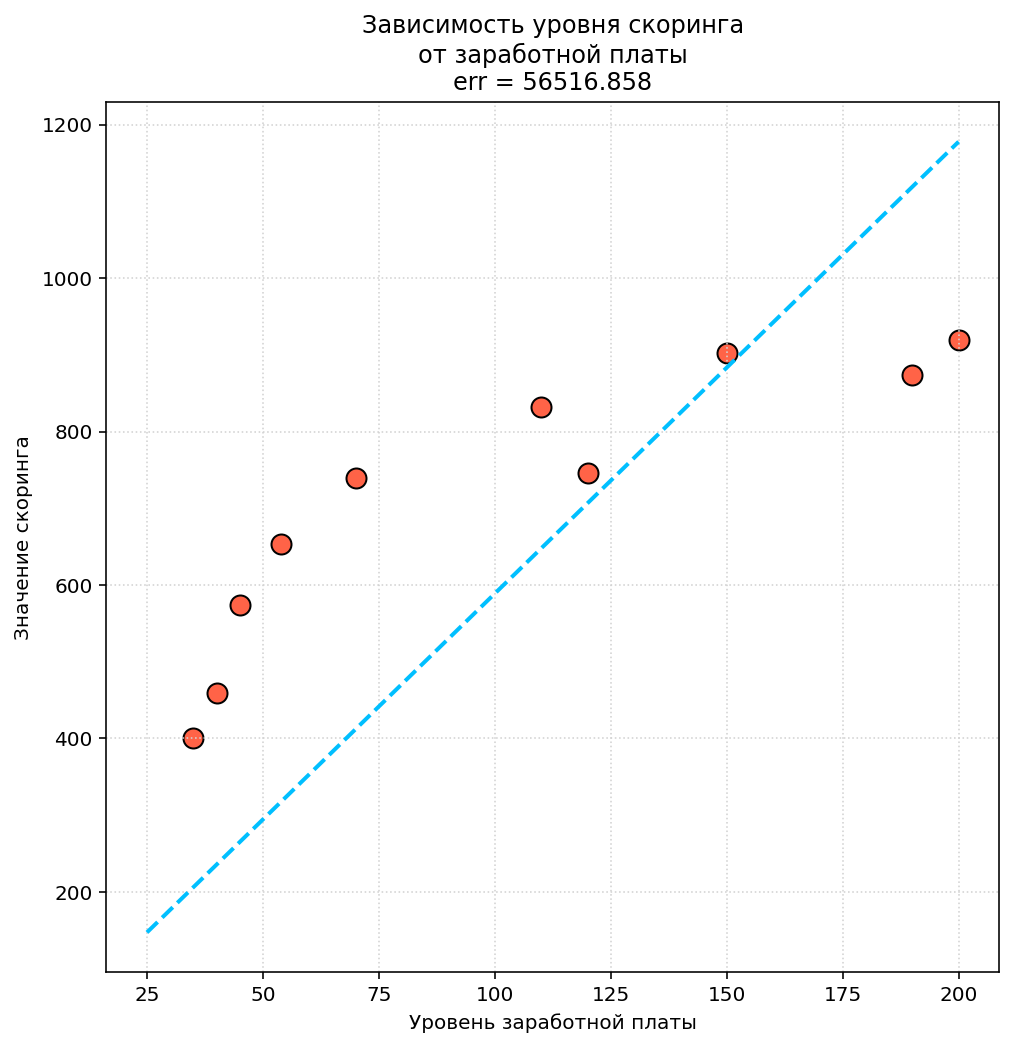

In [24]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(25, 200, 1000)
y = B[0] * x

ax.scatter(zp, ks, s=100, c='tomato', edgecolor='black')
ax.plot(x, y, color='deepskyblue', lw=2, ls='--')
ax.set_xlabel('Уровень заработной платы')
ax.set_ylabel('Значение скоринга')
ax.grid(ls=':', color='lightgray')
ax.set_title(f'Зависимость уровня скоринга\nот заработной платы\nerr = {errore}');

В общем-то - очень похожее с предыдущей задачей решение.

### Задача 3 (Дополнительно)

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Попробуем 🙂

In [25]:
X = zp
X = list(zip([1]*len(X), X))
X = np.array(X)
Y = np.array(ks).reshape(-1, 1)

B = np.array([440, 0.2])

In [26]:
B, dist, x_1, y_1 = gradient_descent(X, Y, B, iters=10000)

In [27]:
X_predict = X.dot(B.transpose()).reshape(-1, 1)

errore = round(mean_squared_error(Y, X_predict), 3)

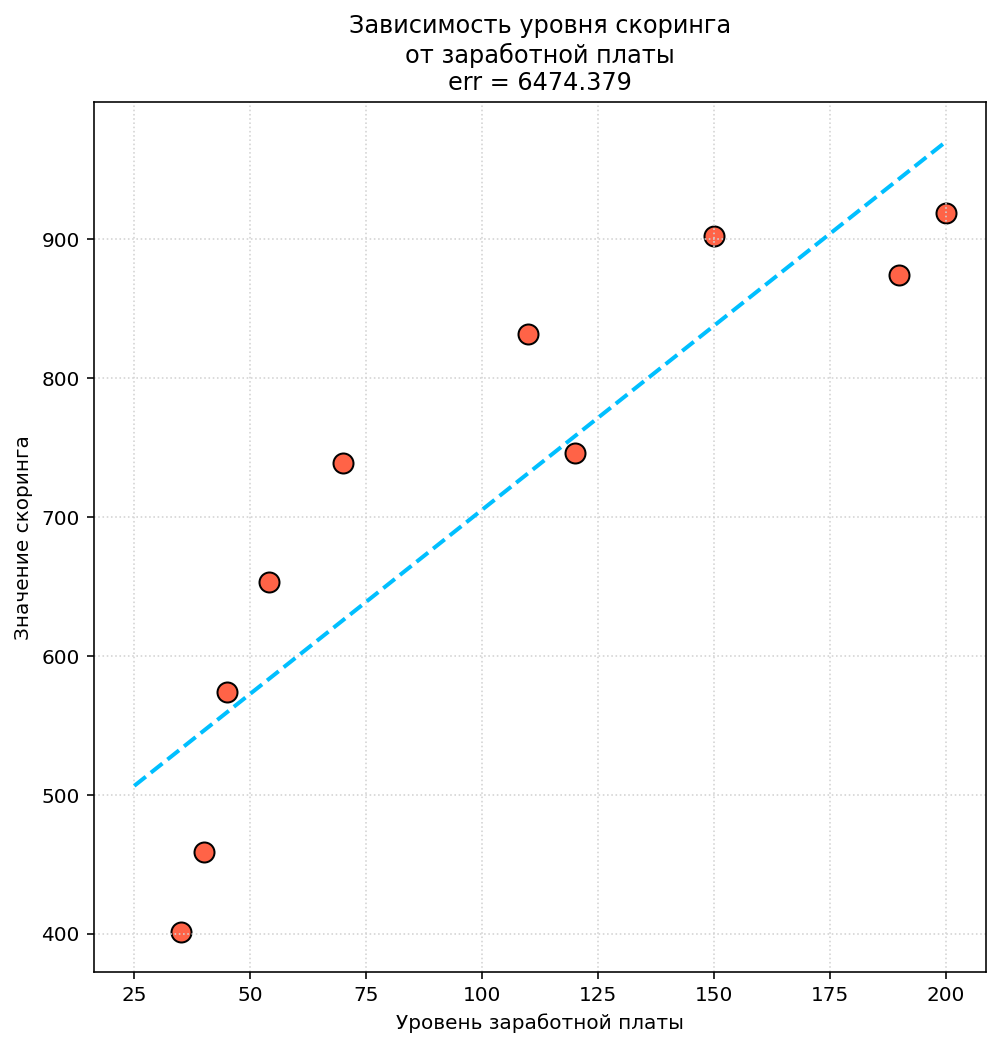

In [28]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(25, 200, 1000)
y = B[0] + B[1] * x

ax.scatter(zp, ks, s=100, c='tomato', edgecolor='black')
ax.plot(x, y, color='deepskyblue', lw=2, ls='--')
ax.set_xlabel('Уровень заработной платы')
ax.set_ylabel('Значение скоринга')
ax.grid(ls=':', color='lightgray')
ax.set_title(f'Зависимость уровня скоринга\nот заработной платы\nerr = {errore}');

И еще один интересный график:

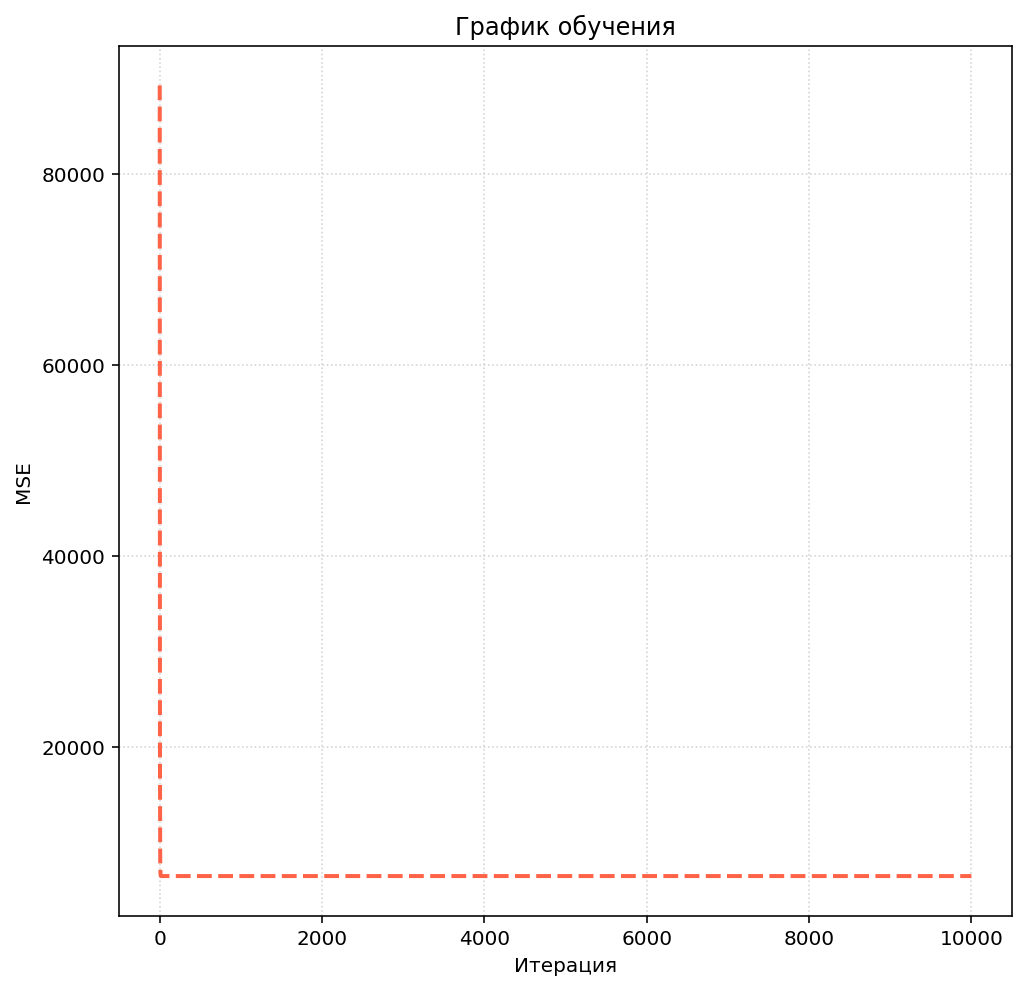

In [29]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(x_1, y_1, color='tomato', lw=2, ls='--')
ax.set_xlabel('Итерация')
ax.set_ylabel('MSE')
ax.grid(ls=':', color='lightgray')
ax.set_title('График обучения');

Не придумал, как с разной скоростью влиять на коэффициенты - увы 🙁